In [31]:
import pvlib
import pandas as pd  # for data wrangling
import matplotlib.pyplot as plt  # for visualization
import pathlib  # for finding the example dataset

print(pvlib.__version__)

0.10.1


In [32]:
# create a path to the pvlib "data" folder using Python pathlib,
# note how you can use `.__file__` to get the path to the pvlib module,
# the `.parent` attribute to get the directory containing a file,
# and "/" operator add nested folders to the path.  Then read a TMY3 file
# that comes with pvlib python in the "data" folder, coercing the year to 1990
DATA_DIR = pathlib.Path(pvlib.__file__).parent / 'data'
df_tmy, metadata = pvlib.iotools.read_tmy3(DATA_DIR / '723170TYA.CSV', coerce_year=1990)

# pvlib iotools.read_tmy3 returns a Pandas DataFrame of the timeseries
# and dictionary of metadata. Use the coordinates of the TMY3 file to
# create a pvlib python "location"
location = pvlib.location.Location(
    latitude=metadata['latitude'], longitude=metadata['longitude'])

# offset the hourly timeseries by 30-minutes to get the solar positions at the
# center of each interval
times = df_tmy.index - pd.Timedelta('30min')
solar_position = location.get_solarposition(times)
# shift the times to the right side of each interval
solar_position.index += pd.Timedelta('30min')

# calculate the positions at each timestep for a north-south aligned tracker
# note by default backtrack is true and GCR = 1/7
tracker_data = pvlib.tracking.singleaxis(
    solar_position['apparent_zenith'], solar_position['azimuth'], axis_azimuth=180)
# set nighttime tracker positions to stow (zero-degrees is horizontal)
tilt = tracker_data['surface_tilt'].fillna(0)
azimuth = tracker_data['surface_azimuth'].fillna(0)

# get the irrall_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']
list(all_parameters.keys())zimuth=azimuth,
    dni=df_tmy['DNI'],
    ghi=df_tmy['GHI'],
    dhi=df_tmy['DHI'],
    solar_zenith=solar_position['apparent_zenith'],
    solar_azimuth=solar_position['azimuth'])
tracker_poa = df_poa_tracker['poa_global']

C:\Users\quean\anaconda3\lib\site-packages\pvlib\iotools\tmy.py:247: pvlibDeprecationWarning: TMY3 variable names will be renamed to pvlib conventions by default starting in pvlib 0.11.0. Specify map_variables=True to enable that behavior now, or specify map_variables=False to hide this warning.
  warnings.warn(


In [33]:
all_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']
list(all_parameters.keys())

['open_rack_glass_glass',
 'close_mount_glass_glass',
 'open_rack_glass_polymer',
 'insulated_back_glass_polymer']

In [34]:
parameters = all_parameters['open_rack_glass_polymer']
# note the "splat" operator "**" which expands the dictionary "parameters"
# into a comma separated list of keyword arguments
cell_temperature = pvlib.temperature.sapm_cell(
    tracker_poa, df_tmy['DryBulb'], df_tmy['Wspd'], **parameters)

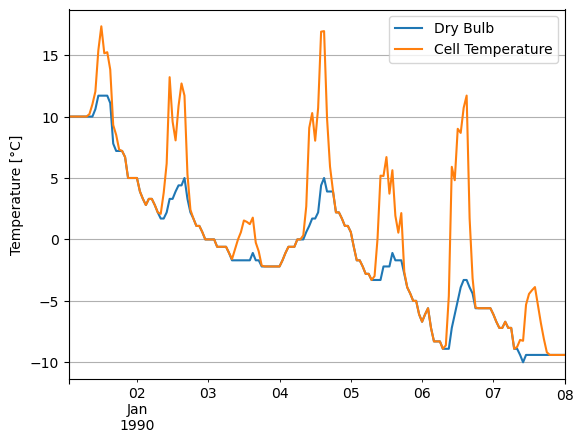

In [35]:
df_tmy['DryBulb'].head(24*7).plot()
cell_temperature.head(24*7).plot()
plt.grid()
plt.legend(['Dry Bulb', 'Cell Temperature'])
# note Python 3 can use unicode characters like the degrees symbol
plt.ylabel('Temperature [°C]');

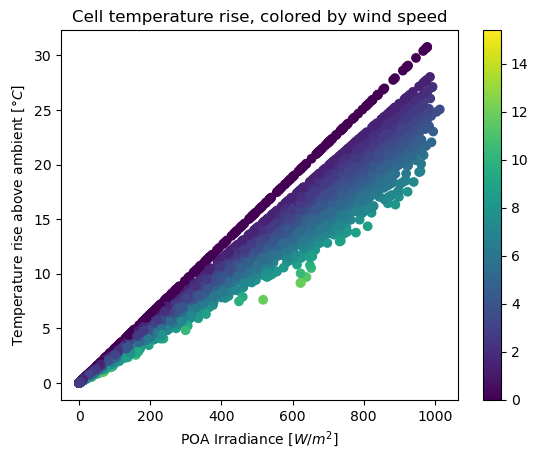

In [36]:
temperature_difference = cell_temperature - df_tmy['DryBulb']
plt.scatter(tracker_poa, temperature_difference, c=df_tmy['Wspd'])
plt.colorbar()
# note you can use LaTeX math in matplotlib labels
# compare \degree" with the unicode symbol above
plt.ylabel('Temperature rise above ambient [$\degree C$]')
plt.xlabel('POA Irradiance [$W/m^2$]');
plt.title('Cell temperature rise, colored by wind speed');